In [31]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib
from statsmodels import *
%matplotlib inline
 

In [3]:
#importing data
data=pd.read_csv('Initial_Data_pulls/Mela_Keywords.csv', nrows=2563)
data.head(10)

,Unnamed: 0,Keyword,Device Category,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue
0,0,dynamic search ads,mobile,"17,092","$5,346.38",$0.31,"21,874",40.04%,4.36,0.99%,216,"$36,398.64"
1,1,dynamic search ads,desktop,"11,688","$5,590.69",$0.48,"13,326",25.37%,6.78,2.61%,348,"$60,660.93"
2,2,mela bags,mobile,"10,481","$3,361.18",$0.32,"14,592",31.89%,4.99,1.01%,148,"$25,512.35"
3,3,mela bags,desktop,"8,760","$2,991.68",$0.34,"10,502",15.07%,8.21,3.15%,331,"$59,409.14"
4,4,melabags,mobile,"5,459",$966.20,$0.18,"7,933",35.30%,4.99,0.86%,68,"$14,337.29"
5,5,+mela +purses,mobile,"5,275","$1,748.55",$0.33,"6,449",48.94%,3.63,0.62%,40,"$8,724.47"
6,6,+mela +wallets,mobile,"5,104","$1,683.94",$0.33,"6,838",35.00%,3.99,1.40%,96,"$12,827.41"
7,7,melabags,desktop,"4,079","$1,113.29",$0.27,"4,924",17.08%,7.67,2.66%,131,"$26,841.46"
8,8,dynamic search ads,tablet,"3,871","$1,534.75",$0.40,"5,003",32.50%,6.29,1.20%,60,"$11,572.25"
9,9,+mela wallet purse,mobile,"3,476",$944.03,$0.27,"4,751",32.31%,4.68,1.12%,53,"$6,820.93"


In [4]:
data.tail(10)

,Unnamed: 0,Keyword,Device Category,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue
2553,2553,zip top tote bag,desktop,1,$0.55,$0.55,1,0.00%,2.00,0.00%,0,$0.00
2554,2554,zip top tote bag,mobile,1,$1.12,$1.12,1,100.00%,1.00,0.00%,0,$0.00
2555,2555,(not provided),desktop,0,$0.00,$0.00,11,45.45%,4.09,0.00%,0,$0.00
2556,2556,(not provided),mobile,0,$0.00,$0.00,15,26.67%,3.47,0.00%,0,$0.00
2557,2557,(not set),desktop,0,$0.00,$0.00,182,42.86%,5.98,2.20%,4,$825.27
2558,2558,(not set),mobile,0,$0.00,$0.00,155,52.90%,4.09,0.00%,0,$0.00
2559,2559,(not set),tablet,0,$0.00,$0.00,22,50.00%,3.32,0.00%,0,$0.00
2560,2560,mela international patti,tablet,0,$0.00,$0.00,1,0.00%,5.00,0.00%,0,$0.00
2561,2561,organizer crossbody,tablet,0,$0.00,$0.00,1,100.00%,1.00,0.00%,0,$0.00
2562,2562,red leather purse,desktop,0,$0.00,$0.00,1,100.00%,1.00,0.00%,0,$0.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2563 entries, 0 to 2562
Data columns (total 12 columns):
Unnamed: 0                   2563 non-null int64
Keyword                      2563 non-null object
Device Category              2563 non-null object
Clicks                       2563 non-null object
Cost                         2563 non-null object
CPC                          2563 non-null object
Sessions                     2563 non-null object
Bounce Rate                  2563 non-null object
Pages / Session              2563 non-null float64
Ecommerce Conversion Rate    2563 non-null object
Transactions                 2563 non-null int64
Revenue                      2563 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 240.4+ KB


In [6]:
#Taking commas out of the clicks category & Sessions
data['Clicks']=data['Clicks'].str.replace(',', '')
data['Sessions']=data['Sessions'].str.replace(',','')

#taking $ and commas out of cost, CPC, and revenue
data['Cost']=data['Cost'].str.replace('$', '')
data['Cost']=data['Cost'].str.replace(',', '')
data['CPC']=data['CPC'].str.replace('$', '')
data['CPC']=data['CPC'].str.replace(',', '')
data['Revenue']=data['Revenue'].str.replace('$', '')
data['Revenue']=data['Revenue'].str.replace(',', '')

#taking % sign out of bounce rate and ecommerce conversion rate
data['Bounce Rate']=data['Bounce Rate'].str.replace('%', '')
data['Ecommerce Conversion Rate']=data['Ecommerce Conversion Rate'].str.replace('%', '')
data.head(10)

,Unnamed: 0,Keyword,Device Category,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue
0,0,dynamic search ads,mobile,17092,5346.38,0.31,21874,40.04,4.36,0.99,216,36398.64
1,1,dynamic search ads,desktop,11688,5590.69,0.48,13326,25.37,6.78,2.61,348,60660.93
2,2,mela bags,mobile,10481,3361.18,0.32,14592,31.89,4.99,1.01,148,25512.35
3,3,mela bags,desktop,8760,2991.68,0.34,10502,15.07,8.21,3.15,331,59409.14
4,4,melabags,mobile,5459,966.20,0.18,7933,35.30,4.99,0.86,68,14337.29
5,5,+mela +purses,mobile,5275,1748.55,0.33,6449,48.94,3.63,0.62,40,8724.47
6,6,+mela +wallets,mobile,5104,1683.94,0.33,6838,35.00,3.99,1.40,96,12827.41
7,7,melabags,desktop,4079,1113.29,0.27,4924,17.08,7.67,2.66,131,26841.46
8,8,dynamic search ads,tablet,3871,1534.75,0.40,5003,32.50,6.29,1.20,60,11572.25
9,9,+mela wallet purse,mobile,3476,944.03,0.27,4751,32.31,4.68,1.12,53,6820.93


In [7]:
#changing clicks, sessions, pages/session, & transactions to float
data['Clicks']=data.Clicks.astype(float)
data['Sessions']=data.Sessions.astype(float)
data['Pages / Session']=data['Pages / Session'].astype(float)
data['Transactions']=data.Transactions.astype(float)
data['Cost']=data.Cost.astype(float)
data['CPC']=data.CPC.astype(float)
data['Bounce Rate']=data['Bounce Rate'].astype(float)
data['Ecommerce Conversion Rate']=data['Ecommerce Conversion Rate'].astype(float)
data['Revenue']=data.Revenue.astype(float)

In [8]:
#computing cost per revenue
data['Cost/Revenue']=data.Cost / data.Revenue

#computing ROI
data['ROI']= (data.Revenue-data.Cost)/data.Cost

#computing sessions per cost
data["Sessions/Cost"]=data.Sessions/data.Cost

In [9]:
#categorizing Bounce rate
bins=[0, 25, 40, 55, 70, 100]
group_names=['very excellent', 'excellent', 'average','higher than average','high']


In [10]:
Bounce_Rate_Category=pd.cut(data["Bounce Rate"], bins, labels=group_names)
data["Bounce Rate Category"]=pd.cut(data["Bounce Rate"], bins, labels=group_names)
data

,Unnamed: 0,Keyword,Device Category,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue,Cost/Revenue,ROI,Sessions/Cost,Bounce Rate Category
0,0,dynamic search ads,mobile,17092.0,5346.38,0.31,21874.0,40.04,4.36,0.99,216.0,36398.64,0.146884,5.808091,4.091366,average
1,1,dynamic search ads,desktop,11688.0,5590.69,0.48,13326.0,25.37,6.78,2.61,348.0,60660.93,0.092163,9.850348,2.383606,excellent
2,2,mela bags,mobile,10481.0,3361.18,0.32,14592.0,31.89,4.99,1.01,148.0,25512.35,0.131747,6.590296,4.341333,excellent
3,3,mela bags,desktop,8760.0,2991.68,0.34,10502.0,15.07,8.21,3.15,331.0,59409.14,0.050357,18.858120,3.510402,very excellent
4,4,melabags,mobile,5459.0,966.20,0.18,7933.0,35.30,4.99,0.86,68.0,14337.29,0.067391,13.838843,8.210515,excellent
5,5,+mela +purses,mobile,5275.0,1748.55,0.33,6449.0,48.94,3.63,0.62,40.0,8724.47,0.200419,3.989546,3.688199,average
6,6,+mela +wallets,mobile,5104.0,1683.94,0.33,6838.0,35.00,3.99,1.40,96.0,12827.41,0.131277,6.617498,4.060715,excellent
7,7,melabags,desktop,4079.0,1113.29,0.27,4924.0,17.08,7.67,2.66,131.0,26841.46,0.041477,23.110034,4.422927,very excellent
8,8,dynamic search ads,tablet,3871.0,1534.75,0.40,5003.0,32.50,6.29,1.20,60.0,11572.25,0.132623,6.540153,3.259814,excellent
9,9,+mela wallet purse,mobile,3476.0,944.03,0.27,4751.0,32.31,4.68,1.12,53.0,6820.93,0.138402,6.225332,5.032679,excellent


In [11]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2563 entries, 0 to 2562
Data columns (total 16 columns):
Unnamed: 0                   2563 non-null int64
Keyword                      2563 non-null object
Device Category              2563 non-null object
Clicks                       2563 non-null float64
Cost                         2563 non-null float64
CPC                          2563 non-null float64
Sessions                     2563 non-null float64
Bounce Rate                  2563 non-null float64
Pages / Session              2563 non-null float64
Ecommerce Conversion Rate    2563 non-null float64
Transactions                 2563 non-null float64
Revenue                      2563 non-null float64
Cost/Revenue                 2556 non-null float64
ROI                          2556 non-null float64
Sessions/Cost                2563 non-null float64
Bounce Rate Category         2116 non-null category
dtypes: category(1), float64(12), int64(1), object(2)
memory usage: 303.1+ KB


,Unnamed: 0,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue,Cost/Revenue,ROI,Sessions/Cost
count,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2556.000000,2556.000000,2563.000000
mean,1281.000000,78.018338,34.692392,0.584951,96.549356,50.391190,3.434858,0.740304,1.435037,243.391420,inf,inf,inf
std,740.018693,571.773039,217.812148,0.452144,726.592241,34.377009,3.125392,5.096292,12.615956,2207.517201,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,640.500000,1.000000,0.745000,0.280000,2.000000,24.875000,1.330000,0.000000,0.000000,0.000000,inf,-1.000000,1.355662
50%,1281.000000,4.000000,2.170000,0.440000,5.000000,50.000000,2.500000,0.000000,0.000000,0.000000,inf,-1.000000,2.500000
75%,1921.500000,17.000000,8.600000,0.750000,19.000000,77.340000,4.500000,0.000000,0.000000,0.000000,inf,-1.000000,3.960396
max,2562.000000,17092.000000,5590.690000,3.930000,21874.000000,100.000000,43.000000,100.000000,348.000000,60660.930000,inf,inf,inf


In [12]:
data.sort_values(by='Clicks', ascending=False).head(10)

,Unnamed: 0,Keyword,Device Category,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue,Cost/Revenue,ROI,Sessions/Cost,Bounce Rate Category
0,0,dynamic search ads,mobile,17092.0,5346.38,0.31,21874.0,40.04,4.36,0.99,216.0,36398.64,0.146884,5.808091,4.091366,average
1,1,dynamic search ads,desktop,11688.0,5590.69,0.48,13326.0,25.37,6.78,2.61,348.0,60660.93,0.092163,9.850348,2.383606,excellent
2,2,mela bags,mobile,10481.0,3361.18,0.32,14592.0,31.89,4.99,1.01,148.0,25512.35,0.131747,6.590296,4.341333,excellent
3,3,mela bags,desktop,8760.0,2991.68,0.34,10502.0,15.07,8.21,3.15,331.0,59409.14,0.050357,18.858120,3.510402,very excellent
4,4,melabags,mobile,5459.0,966.20,0.18,7933.0,35.30,4.99,0.86,68.0,14337.29,0.067391,13.838843,8.210515,excellent
5,5,+mela +purses,mobile,5275.0,1748.55,0.33,6449.0,48.94,3.63,0.62,40.0,8724.47,0.200419,3.989546,3.688199,average
6,6,+mela +wallets,mobile,5104.0,1683.94,0.33,6838.0,35.00,3.99,1.40,96.0,12827.41,0.131277,6.617498,4.060715,excellent
7,7,melabags,desktop,4079.0,1113.29,0.27,4924.0,17.08,7.67,2.66,131.0,26841.46,0.041477,23.110034,4.422927,very excellent
8,8,dynamic search ads,tablet,3871.0,1534.75,0.40,5003.0,32.50,6.29,1.20,60.0,11572.25,0.132623,6.540153,3.259814,excellent
9,9,+mela wallet purse,mobile,3476.0,944.03,0.27,4751.0,32.31,4.68,1.12,53.0,6820.93,0.138402,6.225332,5.032679,excellent


In [13]:
#dataframe with only keywords that yeilded revenue and had more than 10 clicks
data_rev=data[(data.Revenue != 0) & (data.Clicks >10)]
data_rev.describe()

,Unnamed: 0,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue,Cost/Revenue,ROI,Sessions/Cost
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,231.428115,555.453674,236.698083,0.495687,697.814696,36.481054,5.158530,2.365911,11.584665,1967.473674,0.249840,12.158042,3.440437
std,192.143298,1555.333662,583.674237,0.277871,1978.888267,15.031349,1.893301,2.160613,34.481880,6050.782151,0.371860,16.551073,2.461694
min,0.000000,12.000000,1.980000,0.080000,14.000000,0.000000,1.800000,0.150000,1.000000,48.020000,0.008305,-0.647706,0.661686
25%,78.000000,51.000000,21.440000,0.300000,64.000000,25.000000,3.740000,1.010000,1.000000,172.260000,0.062588,2.541804,1.892022
50%,174.000000,139.000000,67.850000,0.420000,168.000000,34.600000,4.750000,1.820000,2.000000,389.190000,0.126062,6.932587,2.834030
75%,347.000000,410.000000,178.240000,0.590000,495.000000,45.210000,6.600000,2.780000,7.000000,1182.000000,0.282342,14.977597,4.060715
max,789.000000,17092.000000,5590.690000,1.500000,21874.000000,77.670000,14.260000,15.000000,348.000000,60660.930000,2.838542,119.404040,22.809278


In [41]:
data_rev.drop("Unnamed: 0", axis=1, inplace=True)

ValueError: labels ['Unnamed: 0'] not contained in axis

In [38]:
#Correlation matrix of all variables
corr=data_rev.corr()
corr

,Clicks,Cost,CPC,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue,Cost/Revenue,ROI,Sessions/Cost
Clicks,1.000000,0.944091,-0.089694,0.996947,-0.080458,0.054892,-0.111703,0.880118,0.869690,-0.045871,-0.069376,0.033297
Cost,0.944091,1.000000,0.051271,0.929753,-0.088159,0.062849,-0.117445,0.875463,0.855522,0.017997,-0.119113,-0.081362
CPC,-0.089694,0.051271,1.000000,-0.095587,0.039605,-0.053106,-0.000871,-0.073967,-0.084928,0.418214,-0.369169,-0.683937
Sessions,0.996947,0.929753,-0.095587,1.000000,-0.078040,0.049373,-0.115618,0.856538,0.846841,-0.049844,-0.067301,0.047233
Bounce Rate,-0.080458,-0.088159,0.039605,-0.078040,1.000000,-0.812135,-0.385144,-0.191406,-0.187430,0.391061,-0.313490,-0.036858
Pages / Session,0.054892,0.062849,-0.053106,0.049373,-0.812135,1.000000,0.347825,0.180531,0.190004,-0.364376,0.364448,0.029731
Ecommerce Conversion Rate,-0.111703,-0.117445,-0.000871,-0.115618,-0.385144,0.347825,1.000000,-0.002508,-0.007808,-0.360020,0.619045,-0.073923
Transactions,0.880118,0.875463,-0.073967,0.856538,-0.191406,0.180531,-0.002508,1.000000,0.990356,-0.105726,-0.004722,0.001125
Revenue,0.869690,0.855522,-0.084928,0.846841,-0.187430,0.190004,-0.007808,0.990356,1.000000,-0.113630,0.016132,0.014524
Cost/Revenue,-0.045871,0.017997,0.418214,-0.049844,0.391061,-0.364376,-0.360020,-0.105726,-0.113630,1.000000,-0.372844,-0.298246


In [48]:
##cmap=matplotlib.cm.get_map('PiYG')

AttributeError: module 'matplotlib.cm' has no attribute 'get_map'

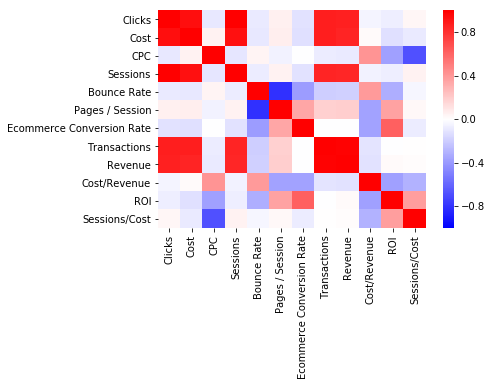

In [55]:
#heatmap of correlations

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1,
        vmax=1,
        center=0,
        cmap = matplotlib.cm.get_cmap('bwr'))

In [15]:
#overall pearson r correlation between cost and revenue
stats.pearsonr(data_rev["Cost"], data_rev["Revenue"])

(0.85552231400919765, 6.5763472459148884e-91)

In [16]:
#overall pearson r correlation between clicks and revenue
stats.pearsonr(data_rev["Clicks"], data_rev["Revenue"])

(0.86969013451232424, 2.2622910324641869e-97)

In [17]:
#overall pearson r correlation between bounce rate and roi
stats.pearsonr(data_rev["Bounce Rate"], data_rev["ROI"])

(-0.31349034978461893, 1.4487898118944346e-08)

In [18]:
#Filtering data by device category
data_rev_desktop=data_rev[data_rev["Device Category"]=="desktop"]
data_rev_tablet=data_rev[data_rev["Device Category"]=="tablet"]
data_rev_mobile=data_rev[data_rev["Device Category"]=="mobile"]

In [19]:
#pearson r correlation beteen cost and revenue for each device type
stats.pearsonr(data_rev_desktop["Cost"], data_rev_desktop["Revenue"])

(0.90916717301686412, 5.975803576515999e-46)

In [20]:
stats.pearsonr(data_rev_tablet["Cost"], data_rev_tablet["Revenue"])

(0.83768342875041224, 5.3416520649408181e-19)

In [21]:
stats.pearsonr(data_rev_mobile["Cost"], data_rev_mobile["Revenue"])

(0.91674742241063067, 1.1881762771107997e-51)

In [22]:
#pearson r correlation beteen clicks and revenue for each device type
stats.pearsonr(data_rev_desktop["Clicks"], data_rev_desktop["Revenue"])

(0.97966073007008181, 9.1888372773314745e-83)

In [23]:
stats.pearsonr(data_rev_tablet["Clicks"], data_rev_tablet["Revenue"])

(0.90842138381120985, 1.0773300208358543e-26)

In [24]:
stats.pearsonr(data_rev_mobile["Clicks"], data_rev_mobile["Revenue"])

(0.98788642817565564, 5.1500545469344059e-103)

In [25]:
#Do the means of clicks differ depending on device category?
stats.f_oneway(data_rev_desktop["Clicks"], data_rev_tablet["Clicks"], data_rev_mobile["Clicks"])

F_onewayResult(statistic=1.8488883582175868, pvalue=0.15914362031928719)

In [26]:
#Do the means of CPC differ depending on device category?
stats.f_oneway(data_rev_desktop["CPC"], data_rev_tablet["CPC"], data_rev_mobile["CPC"])

F_onewayResult(statistic=7.1656909212125841, pvalue=0.00090734368094045573)

In [27]:
stats.ttest_ind(data_rev_desktop["CPC"], data_rev_mobile["CPC"])

Ttest_indResult(statistic=3.6983946762265654, pvalue=0.00026828155309367745)

In [28]:
#Do the means of revenue differ depending on device category?
stats.f_oneway(data_rev_desktop["Revenue"], data_rev_tablet["Revenue"], data_rev_mobile["Revenue"])

F_onewayResult(statistic=1.9040529197539857, pvalue=0.15070169502003614)

In [29]:
#Do the means of ROI differ depending on device category?
stats.f_oneway(data_rev_desktop["ROI"], data_rev_tablet["ROI"], data_rev_mobile["ROI"])

F_onewayResult(statistic=2.9177239577768059, pvalue=0.05554275828670311)